In [3]:
import sys
sys.path.append('./code')
from importlib import reload

In [ ]:
from config import row_colors, columns_to_names, row_colors_dict

In [5]:
import make_figure4
reload(make_figure4)
from make_figure4 import *
import pickle

goodinds = pickle.load(open('./for_snipping/goodinds', 'rb'))
merged_clustdict = pickle.load(open('./for_snipping/merged_clustdict', 'rb'))
merged_inds_to_subset = pickle.load(open('./for_snipping/merged_inds_to_subset', 'rb'))


cooldict_50kb = pickle.load(open('./for_snipping/cooldict_50kb', 'rb'))
ind_to_gene = pickle.load(open('./for_snipping/ind_to_gene', 'rb'))
all_ind_to_region = pickle.load(open('./for_snipping/all_ind_to_region', 'rb'))

my_treg_comp = pickle.load(open('./for_snipping/my_treg_comp', 'rb'))



In [6]:
%load_ext autoreload
%autoreload
import scanpy as sc

sc.settings.set_figure_params(dpi=80, color_map='coolwarm', frameon=True)
plt.rcParams.update({'font.size': 12})
plt.rcParams.update({"axes.grid.axis" : 'both'})
plt.rcParams.update({"axes.grid" : True})

plt.rcParams.update({
    'axes.labelsize': 14,       # x and y labels' font size
    'xtick.labelsize': 8,      # x tick labels' font size
    'ytick.labelsize': 8,      # y tick labels' font size
    'axes.titlesize': 14,        # Axes title font size
    'patch.linewidth' : .35,
    'lines.linewidth' : .5,
    'legend.fontsize': 6,      # Legend font size
})
plt.rcParams['pdf.fonttype'] = 42

plt.rcParams.update({
    'axes.labelsize': 8,       # x and y labels' font size
    'xtick.labelsize': 6,      # x tick labels' font size
    'ytick.labelsize': 6,      # y tick labels' font size
    'axes.titlesize': 10,        # Axes title font size
    'patch.linewidth' : .35,
    'lines.linewidth' : .5,
    'xtick.major.pad' : 2,
    'ytick.major.pad' : 2,

})
plt.rcParams['axes.linewidth'] = .25
plt.rcParams['xtick.major.width'] = .25
plt.rcParams['ytick.major.width'] = .25
plt.rcParams['ytick.major.size'] = 2
plt.rcParams['xtick.major.size'] = 2
plt.rcParams['grid.linewidth'] = .25

plt.rcParams['axes.facecolor'] = 'none' # Or any suitable colour...
plt.rcParams['figure.facecolor'] = 'none'
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['savefig.facecolor'] = 'none'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
from initialize import *
import cooler 

treg_250kb = cooler.Cooler('./Treg_all.mcool::/resolutions/250000')
treg_50kb = cooler.Cooler('./Treg_all.mcool::/resolutions/50000')


(chromsizes, parsed_chroms, region_to_inds, 
    all_region_to_ind, inds_to_region, all_ind_to_region, 
    chrom_to_start, chrom_to_end) = initialize_helper_vars(treg_250kb)

# (_, _, region_to_inds_50kb, all_region_to_ind_50kb, 
#     inds_to_region_50kb, all_ind_to_region_50kb,
#     chrom_to_start_50kb, chrom_to_end_50kb) = initialize_helper_vars(treg_50kb)

In [8]:
gene_to_ind = pickle.load(open('gene_to_ind.p', 'rb'))


In [12]:
_250kb_hub_annotations = pd.read_csv('./annotations/_250kb_hub_annotations.tsv', sep = '\t', index_col=0)

In [31]:
%autoreload 2
from hub_pileup import *
from compute_differential_hic_hub import *
from collections import defaultdict
from make_figure4 import *
import itertools
import cooler

df = pd.DataFrame([goodinds, merged_clustdict['all']]).T
df = df[df[1].isin(merged_inds_to_subset)]
df.columns = ['ind', 'cluster']
df['chrom'] = [all_ind_to_region[x][0] for x in df['ind'].values]
df['chrom'] = 'chr' + df['chrom']


cooldict_25kb_hichip = {
    'tTreg' : cooler.Cooler('./hichip/merged/saka_ttreg.mcool::/resolutions/25000'),
    'CD4SP' : cooler.Cooler('./hichip/merged/saka_cd4sp_all.mcool::/resolutions/25000'),
    'tTreg Precursor' : cooler.Cooler('./hichip/merged/saka_precursor_all.mcool::/resolutions/25000'),
}

from collections import defaultdict
from make_figure4 import *
from hub_pileup import *
import itertools

metadomain_pileup_cooldict = cooldict_50kb
padding_size = 50

inter_all_mat_dict, inter_all_metadata = pileup_bins_with_hub(df, cooldict_25kb_hichip, 
                                                              {'chr' + x : y for x, y in chrom_to_start.items()}, 
                                                              None, 
                                                              None, 
                                                              padding_size=padding_size, 
                                                              fetch_oe=True,
                                                              resolution_out = 25_000,
                                                              skip_metadomains=True)

Done with chr10
Done with chr11
Done with chr11
Done with chr12
Done with chr12
Done with chr12
Done with chr13
Done with chr13
Done with chr13
Done with chr13
Done with chr14
Done with chr14
Done with chr14
Done with chr14
Done with chr14
Done with chr15
Done with chr15
Done with chr15
Done with chr15
Done with chr15
Done with chr15
Done with chr16
Done with chr16
Done with chr16
Done with chr16
Done with chr16
Done with chr16
Done with chr16
Done with chr17
Done with chr17
Done with chr17
Done with chr17
Done with chr17
Done with chr17
Done with chr17
Done with chr17
Done with chr18
Done with chr18
Done with chr18
Done with chr18
Done with chr18
Done with chr18
Done with chr18
Done with chr18
Done with chr18
Done with chr19
Done with chr19
Done with chr19
Done with chr19
Done with chr19
Done with chr19
Done with chr19
Done with chr19
Done with chr19
Done with chr19
Done with chr2
Done with chr2
Done with chr2
Done with chr2
Done with chr2
Done with chr2
Done with chr2
Done with chr2


#### Hub to hub

tTreg


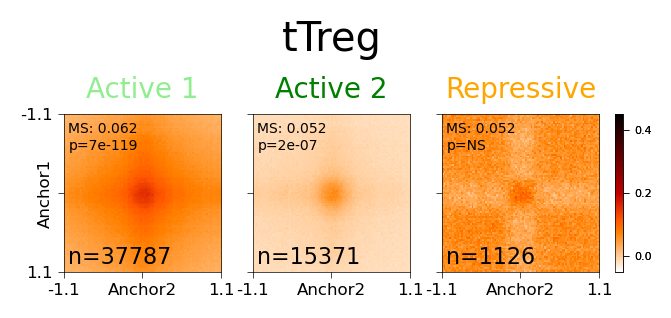

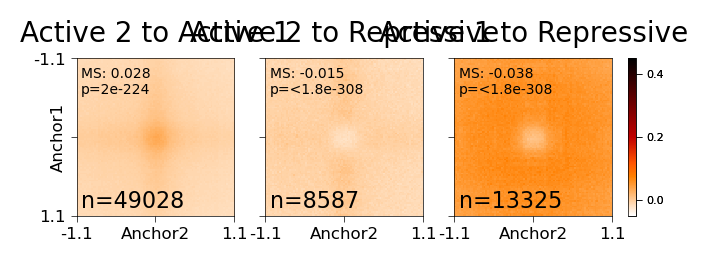

In [38]:
!mkdir -p plots/inter_saka_pileup

newline = '\n'
all_results_dicts = {}
for key in inter_all_mat_dict:
    print(key)
    (fig_within_cluster, fig_between_cluster), results = plot_cluster_pileups_from_result(key, inter_all_mat_dict, inter_all_metadata,
                                     inter_all_metadata['cluster1'].unique(),
                                     res = 25_000,
                                     vmax = .45,
                                     vmin = -.05,
                                     columns_to_names = columns_to_names,
                                     row_colors_dict = row_colors_dict,
                                     s1 = 4,
                                     center = 5,
                                    )
    fig_within_cluster.suptitle(f"{key}", y=4, x=1.7, ha='center')
    fig_within_cluster.savefig(f'./plots/inter_saka_pileup/{key}_within_cluster.pdf', bbox_inches='tight')
    fig_between_cluster.savefig(f'./plots/inter_saka_pileup/{key}_between_cluster.pdf', bbox_inches='tight')
    all_results_dicts[key] = results
    break

In [ ]:
from itertools import combinations

all_datas = []
for u in [0, 4, 18]:
    idx = (inter_all_metadata['cluster1']==u) & (inter_all_metadata['cluster2']==u)
    data = pd.DataFrame()
    for key in inter_all_mat_dict:
        difference = all_results_dicts[key][u]['v_middle'] - all_results_dicts[key][u]['v_outside']
        data[key] = difference
    data['cluster'] = columns_to_names[u]
    all_datas.append(data)

data = pd.concat(all_datas, axis=0)
data = data.melt('cluster')

hue_order = ['CD4SP', 'tTreg Precursor', 'tTreg']
order = ['Constitutive', 'Dynamic', 'Repressive']
pairs = [((x, h1), (x, h2)) for x in order for h1, h2 in combinations(hue_order, 2)]

fig, axs = init_subplots_exact(1, 1, fgsz=(40*mm, 30*mm), dpi = 200)
sns.boxplot(data=data, x='cluster', y='value', hue='variable', fliersize=0,
           hue_order = hue_order,
           palette=['lightgray', 'salmon', 'red'])
plt.ylim([-.15, .4])
plt.gca().set_axisbelow(True)
add_stat_annotation(plt.gca(), data, 'cluster', 'value', 'variable', order, hue_order, pairs)

plt.legend(bbox_to_anchor=(1, 1))
plt.xlabel("Hub")
plt.ylabel("Metadomain score")
plt.title("Metadomain score")
fig.savefig('./plots/inter_saka_pileup/quantification.pdf', bbox_inches = 'tight')

#### Ikzf2 alone with hubs

tTreg


/Genomics/pritykinlab/gabe/jupys/tregs/./code/hub_pileup.py:505: UserWarning: FixedFormatter should only be used together with FixedLocator
  a.set_yticklabels([])


CD4SP


/Genomics/pritykinlab/gabe/jupys/tregs/./code/hub_pileup.py:525: RuntimeWarning: Mean of empty slice
  mat = np.log2(mat)


tTreg Precursor


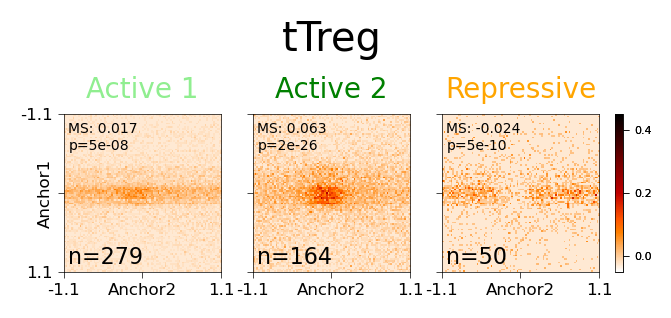

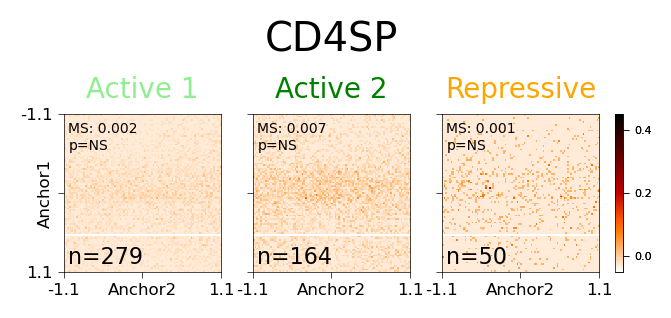

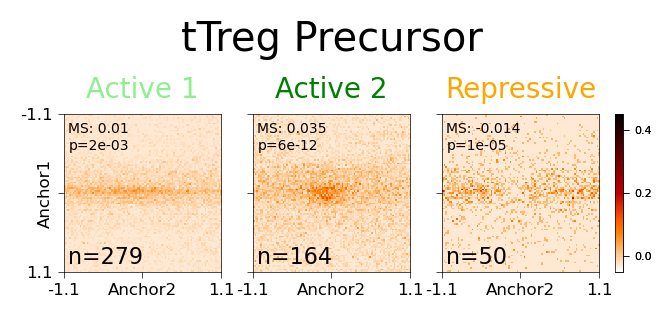

In [59]:
from hub_pileup import plot_ind_pileups_from_result 
!mkdir -p plots/inter_saka_pileup

newline = '\n'
all_results_dicts = {}
for key in inter_all_mat_dict:
    print(key)
    (fig_within_cluster), results = plot_ind_pileups_from_result(key, inter_all_mat_dict, inter_all_metadata,
                                     inter_all_metadata['cluster1'].unique(), 278,
                                     res = 25_000,
                                     vmax = .45,
                                     vmin = -.05,
                                     columns_to_names = columns_to_names,
                                     row_colors_dict = row_colors_dict,
                                     s1 = 4,
                                     center = 5,
                                                                 center_method='center_square',
                                                                 show_filts=False,
                                                                 delta_co = .01
                                    )
    fig_within_cluster = fig_within_cluster[0]
    fig_within_cluster.suptitle(f"{key}", y=4, x=1.7, ha='center')
    fig_within_cluster.savefig(f'./plots/inter_saka_pileup/{key}_ikzf2_within_cluster.pdf', bbox_inches='tight')
    all_results_dicts[key] = results
    # break

### Hubs with A Compartment

In [19]:
adf = pd.DataFrame(_250kb_hub_annotations.index[_250kb_hub_annotations['Hub'] == 'matched_A compartment'],
                  columns=['ind'])
adf['cluster'] = 'A'
adf['chrom'] = ['chr' + all_ind_to_region[x][0] for x in adf['ind']]
adf = adf.iloc[::3]

In [24]:
from hub_pileup import pileup_bins_with_hub

metadomain_pileup_cooldict = cooldict_50kb
padding_size = 50

acomp_all_mat_dict, acomp_all_metadata = pileup_bins_with_hub(adf, cooldict_25kb_hichip, 
                                                              {'chr' + x : y for x, y in chrom_to_start.items()}, 
                                                              None, 
                                                              None, 
                                                              padding_size=padding_size, 
                                                              fetch_oe=True,
                                                              resolution_out = 25_000,
                                                            skip_metadomains=True)

Done with chr10
Done with chr11
Done with chr11
Done with chr12
Done with chr12
Done with chr12
Done with chr13
Done with chr13
Done with chr13
Done with chr13
Done with chr14
Done with chr14
Done with chr14
Done with chr14
Done with chr14
Done with chr15
Done with chr15
Done with chr15
Done with chr15
Done with chr15
Done with chr15
Done with chr16
Done with chr16
Done with chr16
Done with chr16
Done with chr16
Done with chr16
Done with chr16
Done with chr17
Done with chr17
Done with chr17
Done with chr17
Done with chr17
Done with chr17
Done with chr17
Done with chr17
Done with chr18
Done with chr18
Done with chr18
Done with chr18
Done with chr18
Done with chr18
Done with chr18
Done with chr18
Done with chr18
Done with chr19
Done with chr19
Done with chr19
Done with chr19
Done with chr19
Done with chr19
Done with chr19
Done with chr19
Done with chr19
Done with chr19
Done with chr2
Done with chr2
Done with chr2
Done with chr2
Done with chr2
Done with chr2
Done with chr2
Done with chr2


In [25]:
columns_to_names.update({
    'A' : 'A compartment'
})

row_colors_dict.update({
    'A compartment' : 'black',
    
})

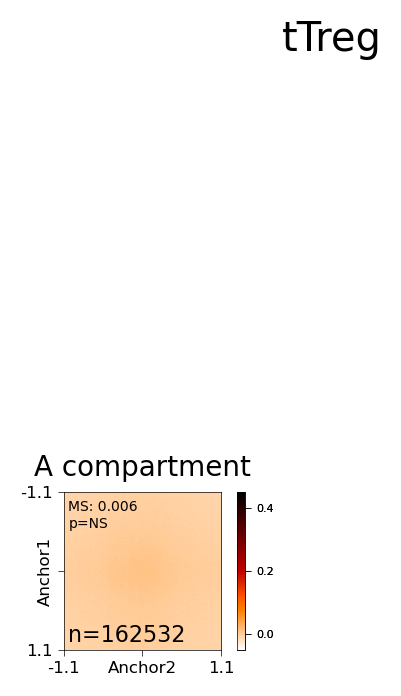

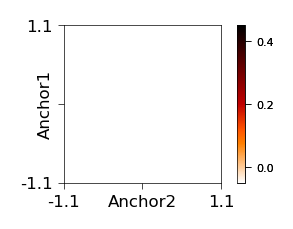

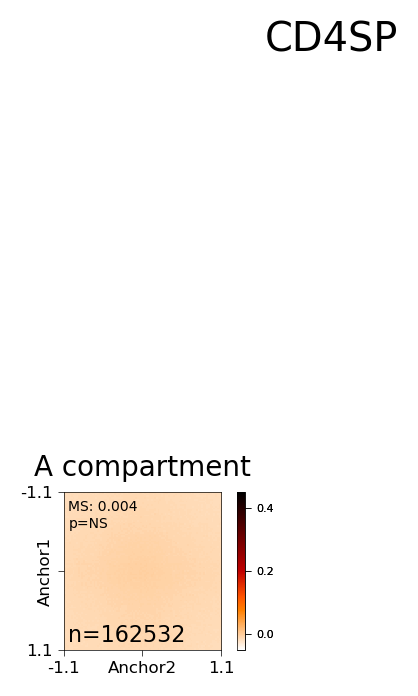

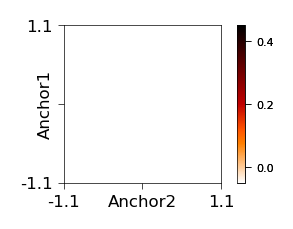

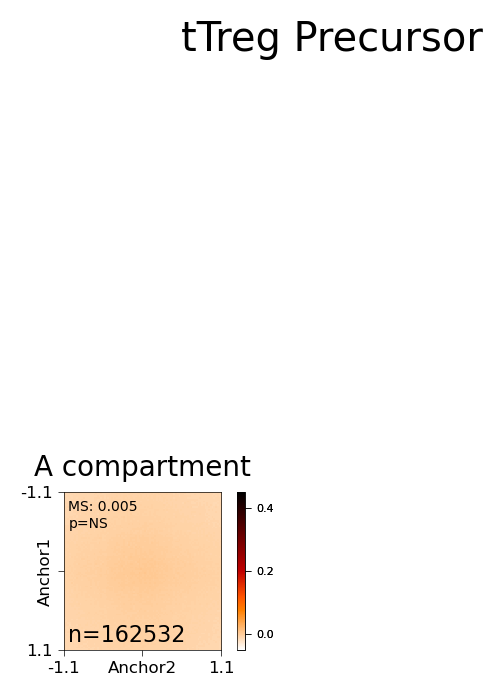

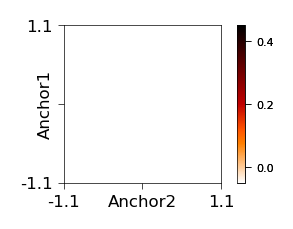

In [40]:
!mkdir -p plots/inter_saka_pileup

newline = '\n'
all_results_dicts = {}
for key in acomp_all_mat_dict:
    (fig_within_cluster, fig_between_cluster), results = plot_cluster_pileups_from_result(key, acomp_all_mat_dict, acomp_all_metadata,
                                     acomp_all_metadata['cluster1'].unique(),
                                     res = 25_000,
                                     vmax = .45,
                                     vmin = -.05,
                                     columns_to_names = columns_to_names,
                                     row_colors_dict = row_colors_dict,
                                     s1 = 4,
                                     center = 5,
                                    delta_co=.01
                                    )
    fig_within_cluster.suptitle(f"{key}", y=4, x=1.7, ha='center')
    fig_within_cluster.savefig(f'./plots/inter_saka_pileup/{key}_acomp.pdf', bbox_inches='tight')
    all_results_dicts[key] = results

In [96]:
from aux_functions import format_pval_as_asterisks

def add_stat_annotation(ax, data, xcol, ycol, hue, order, hue_order, box_pairs):
    """ Add statistical annotations for comparing hue within each x."""
    unique_x = data[xcol].unique()
    hue_levels = data[hue].unique()
    
    # Prepare a mapping from hue and x to x-tick positions
    hue_offsets = {hue: (i-1)*.25 for i, hue in enumerate(hue_order)}
    x_positions = {v: k for k, v in enumerate(order)}

    seen = set()
    for pair in box_pairs:
        if pair[0][0] not in seen:
            seen.add(pair[0][0])
            yoff = 0 
        else:
            yoff += .15
        # Filter data for each pair

        data1 = data[(data[xcol] == pair[0][0]) & (data[hue] == pair[0][1])]
        data2 = data[(data[xcol] == pair[1][0]) & (data[hue] == pair[1][1])]
        print(data1.shape, data2.shape, xcol)
        
        # Perform rank sum test
        stat, p_value = scipy.stats.ranksums(data1[ycol], data2[ycol])
    
        # Find positions for annotations
        x1 = x_positions[pair[0][0]] + hue_offsets[pair[0][1]]
        x2 = x_positions[pair[1][0]] + hue_offsets[pair[1][1]]

        ymax = .25
        y, h, col = ymax + 0.02, 0.01, 'k'

        y = y * (1 + yoff)
        # Draw the lines and annotations
        ax.plot([x1, x1, x2, x2], [y, y + h, y + h, y], lw=.2, c=col)
        ax.text((x1 + x2) * .5, y + h, f'{format_pval_as_asterisks(p_value)}', ha='center', va='bottom', color=col,
               fontsize=4)

/Genomics/argo/users/gdolsten/.conda/envs/mamba/envs/new_3dgenome/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Genomics/argo/users/gdolsten/.conda/envs/mamba/envs/new_3dgenome/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Genomics/argo/users/gdolsten/.conda/envs/mamba/envs/new_3dgenome/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


(698556, 3) (698556, 3) cluster
2.7308265422546616e-146
(698556, 3) (698556, 3) cluster
0.0
(698556, 3) (698556, 3) cluster
0.0


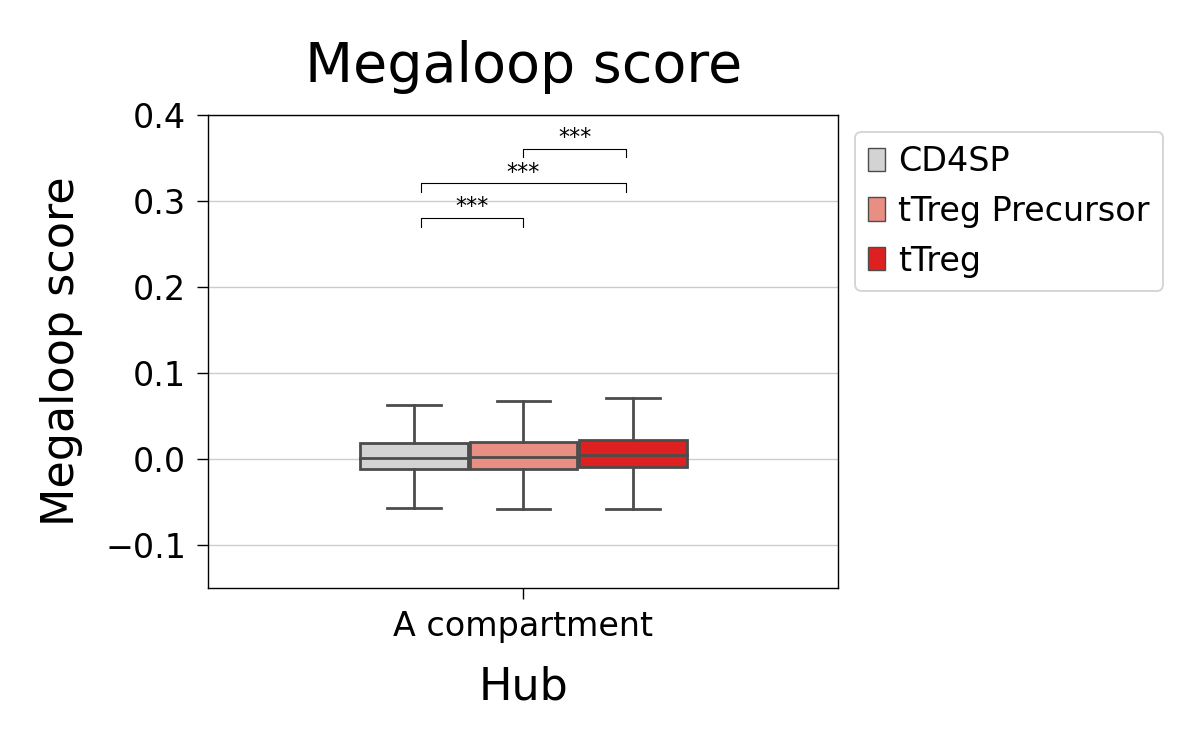

In [97]:
from itertools import combinations

all_datas = []
for u in ['A']:
    idx = (inter_all_metadata['cluster1']==u) & (inter_all_metadata['cluster2']==u)
    data = pd.DataFrame()
    for key in inter_all_mat_dict:
        difference = all_results_dicts[key][u]['v_middle'] - all_results_dicts[key][u]['v_outside']
        data[key] = difference
    data['cluster'] = columns_to_names[u]
    all_datas.append(data)

data = pd.concat(all_datas, axis=0)
data = data.melt('cluster')

hue_order = ['CD4SP', 'tTreg Precursor', 'tTreg']
order = ['A compartment']
pairs = [((x, h1), (x, h2)) for x in order for h1, h2 in combinations(hue_order, 2)]

fig, axs = init_subplots_exact(1, 1, fgsz=(40*mm, 30*mm), dpi = 200)
sns.boxplot(data=data, x='cluster', y='value', hue='variable', fliersize=0,
           hue_order = hue_order,
           palette=['lightgray', 'salmon', 'red'])
plt.ylim([-.15, .4])
plt.gca().set_axisbelow(True)
add_stat_annotation(plt.gca(), data, 'cluster', 'value', 'variable', order, hue_order, pairs)

plt.legend(bbox_to_anchor=(1, 1))
plt.xlabel("Hub")
plt.ylabel("Metadomain score")
plt.title("Metadomain score")
fig.savefig('./plots/inter_saka_pileup/quantification.pdf', bbox_inches = 'tight')